In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from scipy.stats.mstats import winsorize
%matplotlib inline
pd.options.display.max_columns =100

In [212]:
data = pd.read_csv("/Users/evazhao/Downloads/data-scientist-challenge/dataset/data.csv")

In [213]:
data.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,PAY_1
0,1,50000.0,2,3,2,23,2,0,0,0,0,0,50653.0,49348.0,47995.0,40226.0,27828.0,28411.0,2190.0,2027.0,2204.0,996.0,1031.0,1047.0,0,NaN
1,2,10000.0,1,3,2,25,0,0,0,0,0,-1,8525.0,5141.0,5239.0,7911.0,17890.0,10000.0,1500.0,5000.0,4000.0,2000.0,22400.0,0.0,0,NaN
2,3,150000.0,1,3,1,52,0,0,0,0,0,0,88812.0,90649.0,92499.0,94364.0,97589.0,99921.0,2564.0,2616.0,2647.0,4000.0,3158.0,2215.0,1,NaN


10000 Records with no missing data except pay_1(which is all NAN with 100 records only)

In [214]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          10000 non-null  int64  
 1   LIMIT_BAL                   10000 non-null  float64
 2   SEX                         10000 non-null  int64  
 3   EDUCATION                   10000 non-null  int64  
 4   MARRIAGE                    10000 non-null  int64  
 5   AGE                         10000 non-null  int64  
 6   PAY_0                       10000 non-null  int64  
 7   PAY_2                       10000 non-null  int64  
 8   PAY_3                       10000 non-null  int64  
 9   PAY_4                       10000 non-null  int64  
 10  PAY_5                       10000 non-null  int64  
 11  PAY_6                       10000 non-null  int64  
 12  BILL_AMT1                   10000 non-null  float64
 13  BILL_AMT2                   1000

## Data preprocessing: check missing and outliers

In [215]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,PAY_1
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.00000,10000.00000,10000.000000,10000.000000,10000.00000,100.0
mean,5000.50000,167871.000000,1.602300,1.89610,1.57220,35.330800,-0.01890,-0.145500,-0.186000,-0.231100,-0.271700,-0.294800,50612.195500,49023.650700,46799.93640,42601.869500,39850.171700,38425.60490,6015.152100,6.141277e+03,4962.39740,4963.55250,4843.714500,5082.977500,0.22380,0.0
std,2886.89568,131915.001102,0.489447,0.89721,0.54057,9.373023,1.10773,1.186031,1.172664,1.153701,1.122499,1.143601,73300.749998,71281.033886,69673.91968,64340.979145,60256.791344,59510.34968,17944.068158,2.463757e+04,14615.95517,17275.45798,15934.927232,16619.737627,0.41681,0.0
min,1.00000,1000.000000,1.000000,0.00000,0.00000,18.000000,-2.00000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-154973.000000,-67526.000000,-34041.00000,-170000.000000,-37594.000000,-339603.00000,0.000000,0.000000e+00,0.00000,0.00000,0.000000,0.000000,0.00000,0.0
25%,2500.75000,50000.000000,1.000000,1.00000,1.00000,28.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3349.500000,2650.000000,2459.25000,1927.500000,1584.250000,1053.50000,834.500000,7.997500e+02,390.00000,218.75000,165.000000,100.000000,0.00000,0.0
50%,5000.50000,140000.000000,2.000000,2.00000,2.00000,34.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,21527.000000,20792.000000,19688.50000,18758.500000,17790.500000,16524.50000,2100.000000,2.009500e+03,1773.50000,1500.00000,1500.000000,1500.000000,0.00000,0.0
75%,7500.25000,240000.000000,2.000000,2.00000,2.00000,41.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,67139.750000,64672.000000,60810.75000,53434.500000,49799.750000,48802.50000,5022.250000,5.000000e+03,4496.25000,4000.00000,4018.750000,4003.500000,0.00000,0.0
max,10000.00000,800000.000000,2.000000,6.00000,3.00000,75.000000,8.00000,7.000000,7.000000,7.000000,7.000000,7.000000,653062.000000,671563.000000,855086.00000,706864.000000,551702.000000,568638.00000,493358.000000,1.227082e+06,400972.00000,528897.00000,417990.000000,527143.000000,1.00000,0.0


In [216]:
print("Check education values that are unknown:", len(data[data['EDUCATION'].isin([0,4,5,6])]))
print("Check marriage values that are unknown:", len(data[data["MARRIAGE"]==0]))
print("Check pay_0 values that are undocumented:", len(data[data["PAY_0"].isin([0, -2])]))

Check education values that are unknown: 268
Check marriage values that are unknown: 13
Check pay_0 values that are undocumented: 5824


Action:  
1. PAY_1 has lots of missing values and undocumented. Treat as mis-entry and drop the variable
2. Limit balance min 1000 and max 800k. Large limit balance variation sample, std 131k, need log transform.
3. Education has undocumented value 0. Regroup 0,4-other, 5-unknown, 6-unknown into one group label 4 - unknown.  
4. Marriage has undocumented value 0, treat as unknown replace with mode value. 
5. Age: 18-75
6. PAY_0 has undocumented value -2,0. Regroup -2,-1, 0 into one group label 0 (meaning pay duly).  
7. BILL_AMTx e.g. BILL_AMT1 (-155K, 653K). Large bill variation sample. BILL_AMT3 max 855k exceed limit balance max 800k, outlier value may need winsorization. The same for PAY_AMTx.  


In [217]:
#drop pay_1
data.drop(columns = ['PAY_1'], inplace=True)
#update education
data.EDUCATION = data.EDUCATION.replace(5, 4).replace(6,4).replace(0,4)
#impute missing marriage values with mode
data.MARRIAGE.replace(0, data.MARRIAGE.mode()[0])
#rename pay_0 to pay_1 to be consistent, default.payment.next.month to be default
data.rename(columns= {'PAY_0': 'PAY_1', 'default.payment.next.month':'default'}, inplace=True)
# regroup pay_0 = -2/-1/0 into 0 value
for i in range(1,7):
    data['PAY_'+str(i)] = data['PAY_'+str(i)].replace(-2, 0).replace(-1, 0)

In [218]:
# winsorize 3% of the data to exclude extreme values
for i in range(1, 7):
    data['BILL_AMT'+str(i)] = winsorize(data['BILL_AMT'+str(i)], limits=0.01, inplace=True)
    data['PAY_AMT'+str(i)] = winsorize(data['PAY_AMT'+str(i)], limits=0.01, inplace=True)

In [219]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [220]:
# calculate default rate
def default_rate(data):
    rate = data['default'].sum()/len(data)
    return rate
default_rate(data)

0.2238

Observation:  
Prediction variable data imbalance

## EDA: Show conditional probability of default on variables

In [221]:
cols = [f for f in data.columns]
cols.remove( "ID")
cols.remove('default')

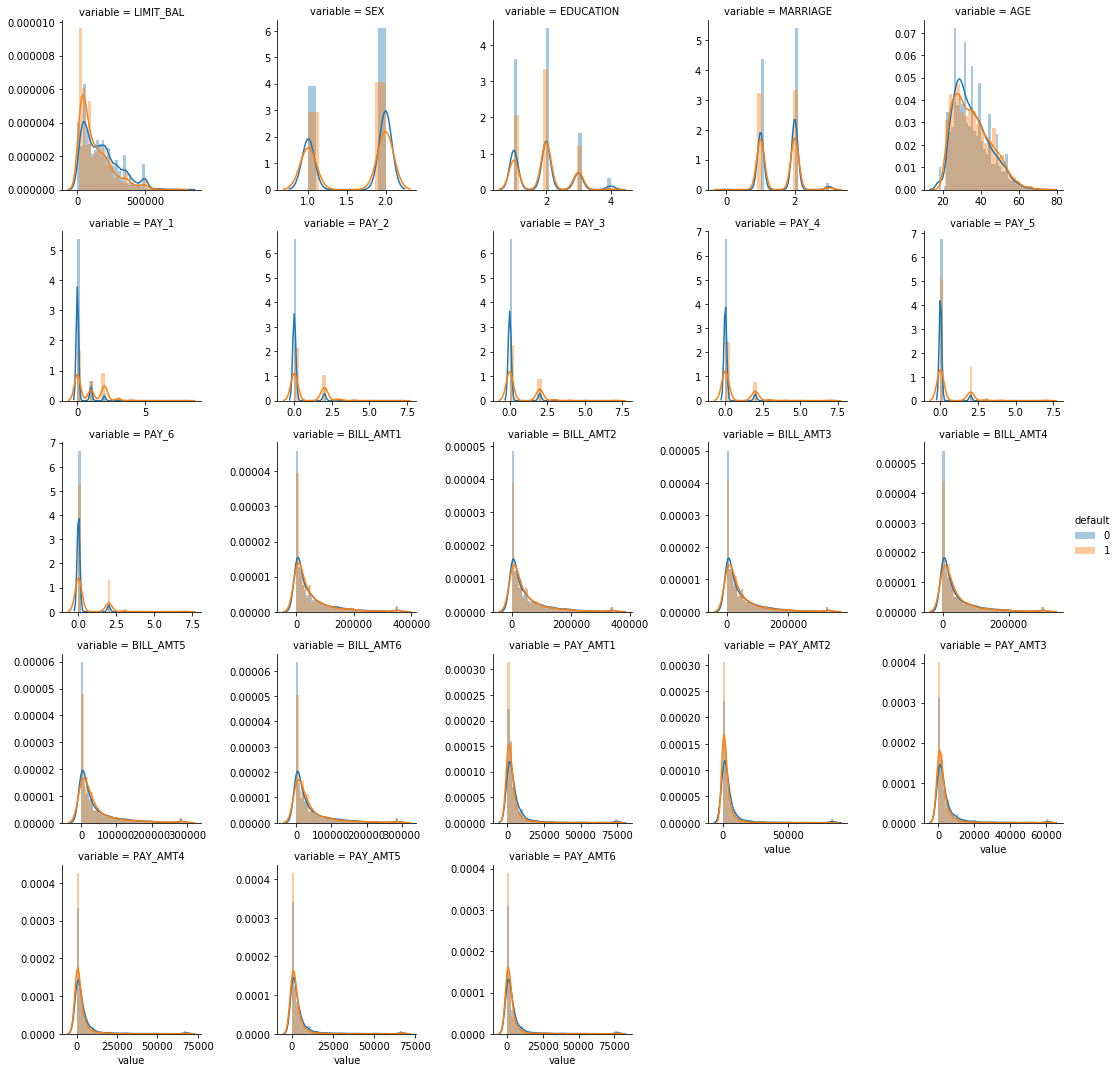

In [222]:
f = pd.melt( data, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

Notation:
blue NonDefault loans; orange Default loans.  
Oberservation:  
1.Default loans have much higher proportion of low limit balance  
2.NonDefault loans have a higher proportion of Females (Sex=2)  
3.NonDefault loans have a higher proportion of MoreEducated (EDUCATION=1 or 2)  or unknown education  
4.NonDefault loans have a higher proportion of Singles (MARRIAGE=2)  
5.NonDefault loans have a higher proportion of people 30-40years  
6.NonDefault loans have a much higher proportion of zero PAY_X variables. This is a strong relationship as the distribution are more separated - so we expect the PAY_X to be important! The same applies to BILLS_AMT_X variables.Default loans on the other hand, have a higher proportation of zero PAY_AMT_X variables. 

## EDA: Show heating map of correlation between default and other variables

In [223]:
# log numercial data to smooth the data
for i in range(1, 7):
    data["log_BILL_AMT"+str(i)]  = data["BILL_AMT"+str(i)].apply( lambda x: np.log1p(x) if (x>0) else 0 )
    data["log_PAY_AMT"+str(i)]  = data["PAY_AMT"+str(i)].apply( lambda x: np.log1p(x) if (x>0) else 0 )

In [224]:
# group similar variables
bill_l = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pay_l = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
pay_status_l = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']



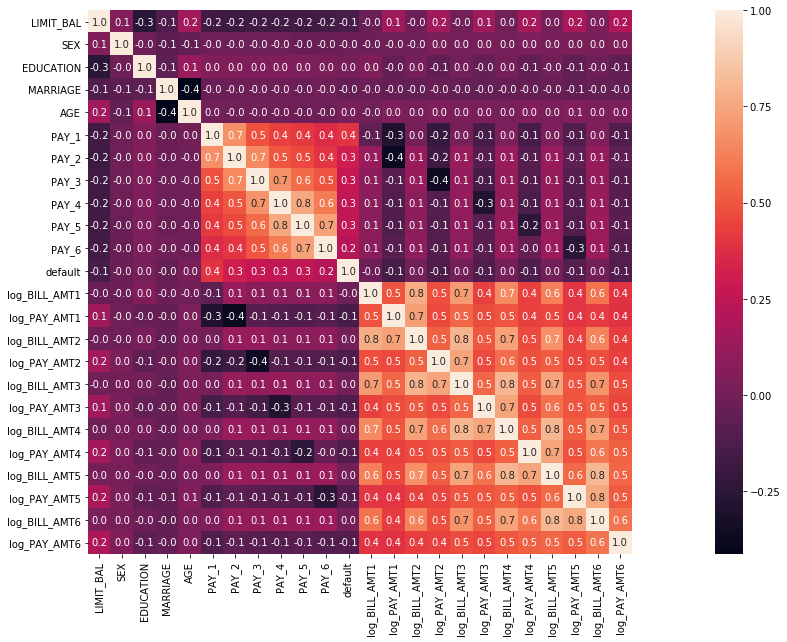

In [227]:
cols = [f for f in data.columns]
cols.remove('ID')
for i in bill_l:
    cols.remove(i)
for i in pay_l:
    cols.remove(i)

corr = data[cols].corr()
plt.subplots(figsize=(30,10))
sns.heatmap( corr, square=True, annot=True, fmt=".1f" )  

Observation:  
LIMIT_BAL,PAY_X, log_BILL_AMT_X and log_PAY_AMT_X variables all have correlation with default.

## Modelling: 7 simple ML algorithms to start

In [232]:
cols.remove('default')
X = data[cols].values    
y = data['default'].values

# data standardization 
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
# train test spliting
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)
# We'll need some metrics to evaluate our models

In [299]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center', height=0.5)
    plt.yticks(range(len(names)), names)
    plt.show()

In [326]:
classifier1 = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=True, n_jobs=1, random_state=1, verbose=0, warm_start=False, class_weight=None)
classifier1.fit( X_train, y_train )
y_pred = classifier1.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for RandomForest = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
print("ROC_AUC score=%.2f" % roc_auc_score(y_test, y_pred))
scoresRF = cross_val_score( classifier1, X_train, y_train, cv=10)
print("Mean RandomForest CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresRF.mean(), scoresRF.std() ))

Accuracy on Test Set for RandomForest = 0.82
ROC_AUC score=0.65
Mean RandomForest CrossVal Accuracy on Train Set 0.81, with std=0.01


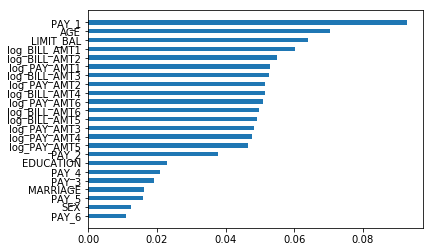

In [300]:
f_importances(classifier1.feature_importances_, cols)

In [327]:
classifier2 = DecisionTreeClassifier(random_state=0)
classifier2.fit( X_train, y_train )
y_pred = classifier2.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for DecisionTree = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
print("ROC_AUC score=%.2f" % roc_auc_score(y_test, y_pred))
scoresRF = cross_val_score( classifier2, X_train, y_train, cv=10)
print("Mean DecisionTree CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresRF.mean(), scoresRF.std() ))

Accuracy on Test Set for DecisionTree = 0.71
ROC_AUC score=0.60
Mean DecisionTree CrossVal Accuracy on Train Set 0.72, with std=0.01


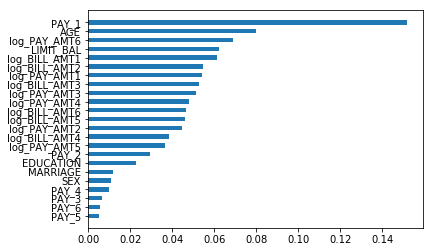

In [302]:
f_importances(classifier2.feature_importances_, cols)

In [328]:
classifier3 = SVC(kernel="linear")
classifier3.fit( X_train, y_train )
y_pred = classifier3.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for kernel-SVM = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
print("ROC_AUC score=%.2f" % roc_auc_score(y_test, y_pred))
scoresSVC = cross_val_score( classifier3, X_train, y_train, cv=10)
print("Mean kernel-SVM CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresSVC.mean(), scoresSVC.std() ))

Accuracy on Test Set for kernel-SVM = 0.82
ROC_AUC score=0.67
Mean kernel-SVM CrossVal Accuracy on Train Set 0.81, with std=0.01


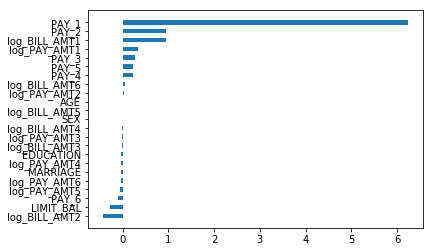

In [305]:
f_importances(classifier3.coef_[0], cols)

In [329]:
classifier4 = LogisticRegression(solver='newton-cg')
classifier4.fit( X_train, y_train )
y_pred = classifier4.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for LogReg = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
print("ROC_AUC score=%.2f" % roc_auc_score(y_test, y_pred))
scoresLR = cross_val_score( classifier4, X_train, y_train, cv=10)
print("Mean LogReg CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresLR.mean(), scoresLR.std() ))

Accuracy on Test Set for LogReg = 0.81
ROC_AUC score=0.64
Mean LogReg CrossVal Accuracy on Train Set 0.81, with std=0.01


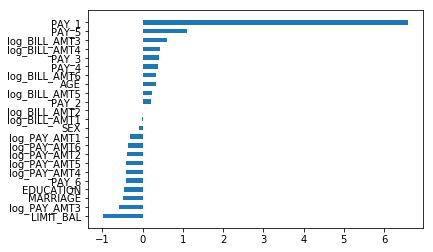

In [308]:
f_importances(classifier4.coef_[0], cols)

In [330]:
classifier5 = KNeighborsClassifier(n_neighbors=5)
classifier5.fit( X_train, y_train )
y_pred = classifier5.predict( X_test )
cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for KNeighborsClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
print("ROC_AUC score=%.2f" % roc_auc_score(y_test, y_pred))
scoresKN = cross_val_score( classifier5, X_train, y_train, cv=10)
print("Mean KN CrossVal Accuracy on Train Set Set %.2f, with std=%.2f" % (scoresKN.mean(), scoresKN.std() ))

Accuracy on Test Set for KNeighborsClassifier = 0.79
ROC_AUC score=0.63
Mean KN CrossVal Accuracy on Train Set Set 0.78, with std=0.01


In [331]:
classifier6 = AdaBoostClassifier(learning_rate=0.04)
classifier6.fit( X_train, y_train )
y_pred = classifier6.predict( X_test )
cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for AdaBoostClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
print("ROC_AUC score=%.2f" % roc_auc_score(y_test, y_pred))
scoresKN = cross_val_score( classifier6, X_train, y_train, cv=10)
print("Mean AdaBoost CrossVal Accuracy on Train Set Set %.2f, with std=%.2f" % (scoresKN.mean(), scoresKN.std() ))

Accuracy on Test Set for AdaBoostClassifier = 0.82
ROC_AUC score=0.64
Mean AdaBoost CrossVal Accuracy on Train Set Set 0.82, with std=0.01


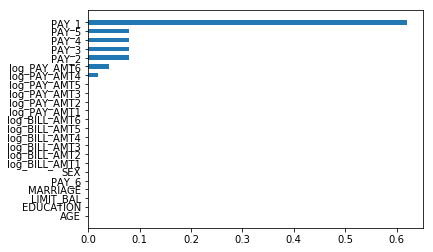

In [296]:
f_importances(classifier6.feature_importances_, cols)

In [332]:
classifier7 = CatBoostClassifier(learning_rate=0.04, silent=True)
classifier7.fit( X_train, y_train )
y_pred = classifier7.predict( X_test )
cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for Catboost = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
print("ROC_AUC score=%.2f" % roc_auc_score(y_test, y_pred))
scoresKN = cross_val_score( classifier7, X_train, y_train, cv=10)
print("Mean Catboost CrossVal Accuracy on Train Set Set %.2f, with std=%.2f" % (scoresKN.mean(), scoresKN.std() ))

Accuracy on Test Set for Catboost = 0.81
ROC_AUC score=0.64
Mean Catboost CrossVal Accuracy on Train Set Set 0.81, with std=0.01


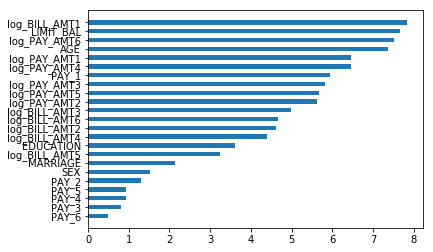

In [322]:
f_importances(classifier7.feature_importances_, cols)

In [333]:
classifier8=MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False,
       epsilon=1e-08, hidden_layer_sizes=(5,2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.001, validation_fraction=0.1, verbose=False,
       warm_start=False)
classifier8.fit( X_train, y_train )
y_pred = classifier8.predict( X_test )
cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for neural network = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
print("ROC_AUC score=%.2f" % roc_auc_score(y_test, y_pred))
scoresKN = cross_val_score( classifier8, X_train, y_train, cv=10)
print("Mean neural network CrossVal Accuracy on Train Set Set %.2f, with std=%.2f" % (scoresKN.mean(), scoresKN.std() ))

Accuracy on Test Set for neural network = 0.81
ROC_AUC score=0.64
Mean neural network CrossVal Accuracy on Train Set Set 0.80, with std=0.01


### Test on ensemble model: using all the algorithms to vote

In [325]:
from sklearn.ensemble import VotingClassifier

In [344]:
eclf1 = VotingClassifier(estimators=
                         [('rf', classifier1), ('dt', classifier2), ('svc', classifier3),\
                         ('lgt', classifier4), ('kn', classifier5), ('ada', classifier6),\
                         ('cat', classifier7), ('ann', classifier8)],\
                         voting='hard')
eclf1 = eclf1.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy on Test Set for voting = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
print("ROC_AUC score=%.2f" % roc_auc_score(y_test, y_pred))
scoresKN = cross_val_score( classifier3, X_train, y_train, cv=10)
print("Mean voting CrossVal Accuracy on Train Set Set %.2f, with std=%.2f" % (scoresKN.mean(), scoresKN.std() ))

Accuracy on Test Set for voting = 0.81
ROC_AUC score=0.64
Mean voting CrossVal Accuracy on Train Set Set 0.81, with std=0.01


## Model evaluation

1. In terms of test accuracy, several models are performing well that is RandomForest, SVC.
2. In terms of roc_auc, linear SVC has the best performance.
3. Voting would be a good strategy to continue, which requires more refinement in weights tuning. 